<a href="https://colab.research.google.com/github/SSevgi/Mass-Models-Implemantations/blob/main/reduced_mass_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

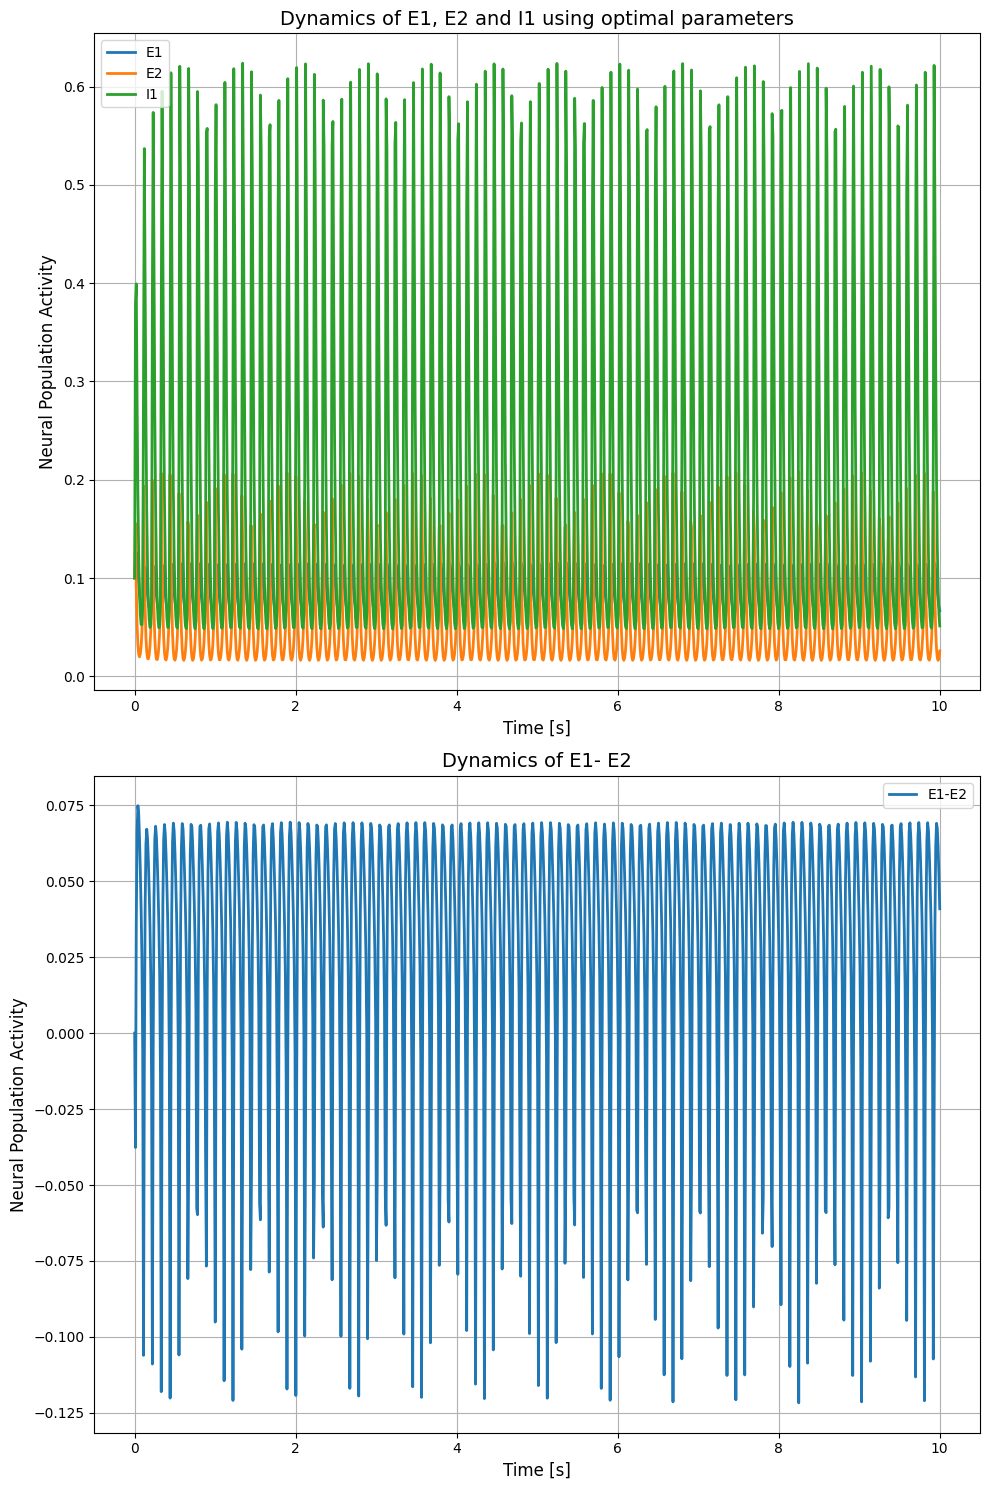

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#constanst for frequency
tau_i = 0.018
tau_e = tau_i

#sigmoid constants
ae = 1.2
ai = 1
theta_e = 2.8
theta_i = 4

k = 1
r = 3

c22 = 28
c32 = 14
c23 = 28
c33 = 2
c11 = 4
c21 = 4
c12 = 2

#definition of sigmoid functions
def sigmoid_e(x, theta_e):
    return 1 / (1 + np.exp(-ae*(x - theta_e)))

def sigmoid_i(x, theta_i):
    return 1 / (1 + np.exp(-ai*(x - theta_i)))

#definition of three main diff equation 
def system_of_equations(t, y):
    E1,E2, I1 = y
    
    dE1dt = (-E1 + (k + r * E1) * sigmoid_e( c11 * E1 + c21 * E2, theta_e ))*(1 / tau_e)
    dE2dt = (-E2 + (k + r * E2) * sigmoid_e( c22 * E2 + c12 * E1 - c32 * I1, theta_e )) * (1 / tau_e)
    dI1dt = (-I1 + (k + r * I1) * sigmoid_i( - c33 * I1 + c23 * E2, theta_i )) * (1 / tau_i)

    return [dE1dt, dE2dt, dI1dt]

#plotting
time = np.linspace(0, 10, 1000)
initial_conditions = [0.1, 0.1, 0.1]

solution = solve_ivp(system_of_equations, (time[0], time[-1]), initial_conditions, t_eval=time)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 15))

ax1.plot(solution.t, solution.y[0], label="E1", linewidth=2)
ax1.plot(solution.t, solution.y[1], label="E2", linewidth=2)
ax1.plot(solution.t, solution.y[2], label="I1", linewidth=2)
ax1.set_xlabel("Time [s]", fontsize=12)
ax1.set_ylabel("Neural Population Activity", fontsize=12)
ax1.legend(fontsize=10)
ax1.set_title("Dynamics of E1, E2 and I1 using optimal parameters", fontsize=14)
ax1.grid()

#plotting y(t)= E1(t)-E2(t)
ax2.plot(solution.t, solution.y[0]- solution.y[1], label="E1-E2", linewidth=2)
ax2.set_xlabel("Time [s]", fontsize=12)
ax2.set_ylabel("Neural Population Activity", fontsize=12)
ax2.legend(fontsize=10)
ax2.set_title("Dynamics of E1- E2", fontsize=14)
ax2.grid()


plt.tight_layout()
plt.show()
